#📌 Extracão

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [84]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)


In [85]:
# Combina todos os dados separados em um único DataFrame
# Remove colunas aninhadas originais e expande seus conteúdos com pd.json_normalize
dados_df = pd.concat([
    dados.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(dados['customer']),
    pd.json_normalize(dados['phone']),
    pd.json_normalize(dados['internet']),
    pd.json_normalize(dados['account'])
], axis=1)

# Exibe as primeiras linhas do novo DataFrame consolidado
dados_df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [86]:
# Renomeia os cabeçalhos das colunas para nomes mais intuitivos e em português
# Facilita a leitura e interpretação dos dados ao longo da análise
dados_df = dados_df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Conjuge',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Meses_Permanencia',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
})

In [87]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Possui_Conjuge        7267 non-null   object 
 5   Possui_Dependentes    7267 non-null   object 
 6   Meses_Permanencia     7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  OnlineSecurity        7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [88]:
# Verifica se há duplicatas na coluna 'ID_Cliente'
# Retorna uma série booleana indicando se cada ID já apareceu anteriormente
dados_df.ID_Cliente.duplicated()

,ID_Cliente
0,False
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,False


In [89]:
# Converte colunas originalmente do tipo texto ('object') para tipo numérico
# Valores inválidos serão transformados em NaN (com 'errors="coerce"')
colunas_transformadas = ['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']

dados_df[colunas_transformadas] = dados_df[colunas_transformadas].apply(pd.to_numeric, errors='coerce')

# Exibe os tipos de dados atualizados das colunas do DataFrame
dados_df.dtypes

,0
ID_Cliente,object
Cancelou,object
Genero,object
Idoso,int64
Possui_Conjuge,object
Possui_Dependentes,object
Meses_Permanencia,int64
Servico_Telefone,object
Multiplas_Linhas,object
Tipo_Internet,object


In [90]:
# Verifica a quantidade de valores nulos (NaN) em cada coluna do DataFrame
dados_df.isnull().sum()

,0
ID_Cliente,0
Cancelou,0
Genero,0
Idoso,0
Possui_Conjuge,0
Possui_Dependentes,0
Meses_Permanencia,0
Servico_Telefone,0
Multiplas_Linhas,0
Tipo_Internet,0


In [91]:
dados_df[dados_df['Cobranca_Total'].isnull()]

dados_df['Cobranca_Total'] = dados_df['Cobranca_Total'].fillna(0)

dados_df['Cancelou'] = dados_df['Cancelou']



In [92]:
# Lista de valores que representam ausência de dados, mesmo não sendo nulos técnicos
false_null_values = ['', ' ', 'NA', 'NaN', 'null']

# Seleciona colunas do tipo texto ('object') para análise de falsos nulos
object_cols_to_check = dados_df.select_dtypes(include='object').columns

# Identifica colunas que já foram convertidas para booleano e que não precisam ser verificadas
boolean_mapped_cols = [col for col, dtype in dados_df.dtypes.items() if dtype == 'bool' and col in object_cols_to_check]

# Filtra apenas as colunas de texto que ainda não foram mapeadas como booleanas
cols_to_check = [col for col in object_cols_to_check if col not in boolean_mapped_cols]

# Exibe as colunas que serão verificadas
print("Verificando 'falso nulo' nas seguintes colunas:")
print(cols_to_check)
print("-" * 30)

# Para cada coluna selecionada, verifica se há valores que representam ausência de dados
for col in cols_to_check:
    false_nulls_in_col = dados_df[dados_df[col].astype(str).str.strip().isin(false_null_values)]

    # Se houver registros com falsos nulos, exibe as linhas e a contagem
    if not false_nulls_in_col.empty:
        print(f"Linhas com 'falso nulo' na coluna '{col}':")
        display(false_nulls_in_col)
        print(f"\nContagem de 'falso nulo' na coluna '{col}': {false_nulls_in_col.shape[0]}")
        print("-" * 30)
    else:
        # Caso não haja falsos nulos, informa que a coluna está limpa
        print(f"Nenhum 'falso nulo' encontrado na coluna '{col}'.")
        print("-" * 30)

Verificando 'falso nulo' nas seguintes colunas:
['ID_Cliente', 'Cancelou', 'Genero', 'Possui_Conjuge', 'Possui_Dependentes', 'Servico_Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento']
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'ID_Cliente'.
------------------------------
Linhas com 'falso nulo' na coluna 'Cancelou':


,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90



Contagem de 'falso nulo' na coluna 'Cancelou': 224
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Genero'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Possui_Conjuge'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Possui_Dependentes'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Servico_Telefone'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Multiplas_Linhas'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tipo_Internet'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'OnlineSecurity'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Backup_Online'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Protecao_Dispositivo'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Suporte_Tecnico'.
------------------------------
Nenhum 'fals

#🔧 Transformação

In [93]:
dados_df.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [94]:
# Cria uma coluna com o valor diário estimado a partir da cobrança mensal
dados_df['Cobranca_diaria_(valorMensal)'] = round(dados_df['Cobranca_Mensal'] / 30, 2)

# Cria uma coluna com o valor diário estimado a partir da cobrança total e tempo de permanência
dados_df['Cobranca_diaria_(valorTotal)'] = round(dados_df['Cobranca_Total'] / dados_df['Meses_Permanencia'] / 30, 2)

# Exibe as primeiras linhas do DataFrame atualizado
dados_df.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,2.97


In [95]:
dados_df.query("Meses_Permanencia == 12")

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
39,0064-SUDOG,No,Female,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.30,224.50,0.68,0.62
86,0135-NMXAP,Yes,Female,0,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.75,1052.40,2.99,2.92
124,0208-BPQEJ,No,Female,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.40,198.10,0.65,0.55
181,0282-NVSJS,No,Female,1,Yes,Yes,12,No,No phone service,DSL,...,Yes,No,No,Month-to-month,Yes,Mailed check,29.30,355.90,0.98,0.99
381,0547-HURJB,No,Male,0,No,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),21.05,235.80,0.70,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,9391-EOYLI,Yes,Male,1,Yes,No,12,Yes,No,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,80.45,950.20,2.68,2.64
6854,9456-ETVCM,,Male,0,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,No,Electronic check,94.55,1173.55,3.15,3.26
7131,9817-APLHW,No,Male,0,No,No,12,Yes,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,25.00,316.20,0.83,0.88
7152,9837-FWLCH,No,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0.64,0.66


#📊 Carga e análise

In [96]:
dados_df.describe()

,Idoso,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157292,2.158461
std,0.369074,24.571773,30.129572,2268.648587,1.004407,1.007454
min,0.000000,0.000000,18.250000,0.000000,0.610000,0.460000
25%,0.000000,9.000000,35.425000,396.200000,1.180000,1.190000
50%,0.000000,29.000000,70.300000,1389.200000,2.340000,2.340000
75%,0.000000,55.000000,89.875000,3778.525000,2.995000,3.010000
max,1.000000,72.000000,118.750000,8684.800000,3.960000,4.050000


***PRECISAMOS ENTENDER ESSA COLUNA DE IDOSO, OS IDOSOS PERMANECEM MAIS TEMPO? **

In [97]:
dados_Idosos = dados_df.query('Idoso == 1')
dados_Nao_Idosos = dados_df.query('Idoso == 0')

In [98]:
print( '//  Dados de pessoas Idosas \\')
dados_Idosos[['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']].mean()





//  Dados de pessoas Idosas \


,0
Meses_Permanencia,33.360406
Cobranca_Mensal,79.785195
Cobranca_Total,2812.864848


In [99]:
print('// Dados de Não Idosos \\ ')

dados_Nao_Idosos[['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']].mean()

// Dados de Não Idosos \ 


,0
Meses_Permanencia,32.149548
Cobranca_Mensal,61.793730
Cobranca_Total,2173.126639


In [100]:
# Calcula o número total de clientes idosos
numero_idosos = dados_Idosos['Idoso'].sum()

# Calcula o número total de clientes não idosos
numero_nao_idosos = quantidade_Nao_idosos = dados_df.query('Idoso == 0').shape[0]

# Soma o total de clientes (idosos + não idosos)
total = numero_idosos + numero_nao_idosos

# Calcula o número de idosos que continuam como clientes ativos
idosos_permanentes = dados_df.query('Idoso == 1 & Cancelou == "No"').shape[0]

# Exibe os resultados da análise por faixa etária
print(f'Numero de Idosos nos dados coletados é de : {numero_idosos}, e o numero de Não Idosos é de: {numero_nao_idosos}')
print('\n')
print('Com isso Conseguimos fazer algumas analises')
print('\n')
print(f'A proporção de Idosos no df é de : {numero_idosos / total:.2%}')
print('\n')
print(f'Numero de Idosos que ainda permanecem é de {idosos_permanentes}, e é de proporção de {idosos_permanentes / total:.2%}')

Numero de Idosos nos dados coletados é de : 1182, e o numero de Não Idosos é de: 6085


Com isso Conseguimos fazer algumas analises


A proporção de Idosos no df é de : 16.27%


Numero de Idosos que ainda permanecem é de 666, e é de proporção de 9.16%


In [101]:
Clientes_total = dados_df.query('Cancelou == "No"').shape[0]

Clientes_nao_Idosos = Clientes_total - idosos_permanentes

Clientes_Cancelados = dados_df.query('Cancelou == "Yes"').shape[0]

print(f'Clientes totais: {Clientes_total} \n Clientes não idosos: {Clientes_nao_Idosos}, \n Total de Clientes Cancelados: {Clientes_Cancelados}. \n Proporção de Cancelamento {Clientes_Cancelados / Clientes_total:.2%}')

Clientes totais: 5174 
 Clientes não idosos: 4508, 
 Total de Clientes Cancelados: 1869. 
 Proporção de Cancelamento 36.12%


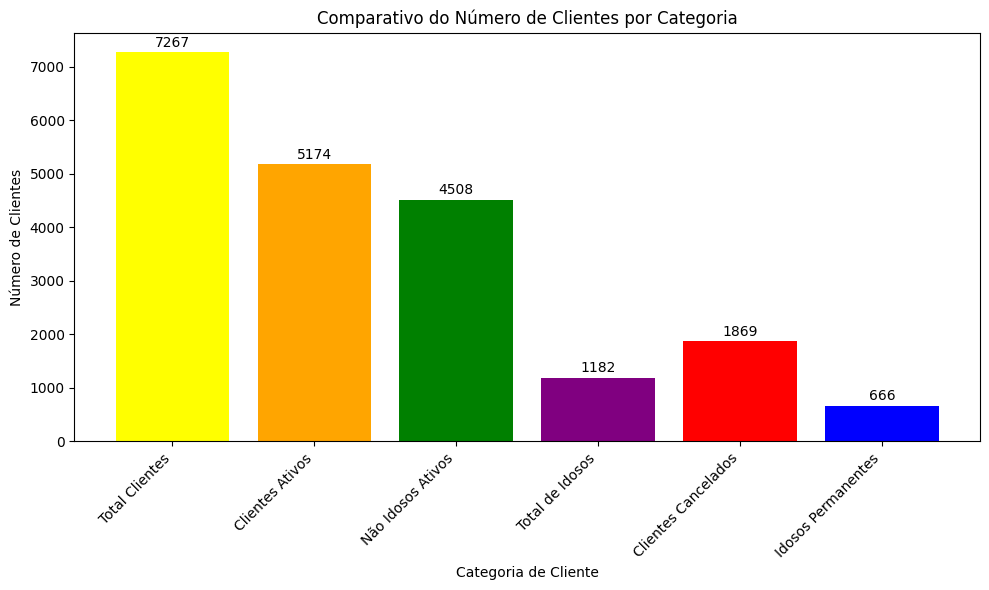

In [102]:
# Define os rótulos das categorias que serão exibidas no gráfico
labels = ['Total Clientes', 'Clientes Ativos', 'Não Idosos Ativos', 'Total de Idosos', 'Clientes Cancelados', 'Idosos Permanentes']

# Define os valores correspondentes a cada categoria com base nas variáveis previamente calculadas
# Certifique-se de que todas essas variáveis foram definidas anteriormente
values = [total, Clientes_total, Clientes_nao_Idosos, numero_idosos, Clientes_Cancelados, idosos_permanentes]

# Inicializa o gráfico de barras e define o tamanho da figura
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['Yellow', 'orange', 'green', 'purple', 'red', 'blue'])

# Define o título do gráfico e os rótulos dos eixos
plt.title('Comparativo do Número de Clientes por Categoria')
plt.xlabel('Categoria de Cliente')
plt.ylabel('Número de Clientes')

# Rotaciona os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Exibe os valores numéricos acima de cada barra
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')

# Ajusta o layout para evitar cortes ou sobreposição de elementos
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [103]:
dados_df.head()



,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,2.97


In [104]:
Clientes_Mulheres = dados_df.query('Genero == "Female"')
Clientes_Homens = dados_df.query('Genero == "Male"')

Clientes_mulheres_total = dados_df.query('Genero == "Female"').shape[0]
clientes_mulheres_ativas = dados_df.query('Genero == "Female" & Cancelou == "No"').shape[0]
clientes_mulheres_canceladas = dados_df.query('Genero == "Female" & Cancelou == "Yes"').shape[0]

Clientes_Homens_total = dados_df.query('Genero == "Male"').shape[0]
clientes_homens_ativos = dados_df.query('Genero == "Male" & Cancelou == "No"').shape[0]
clientes_homens_cancelados = dados_df.query('Genero == "Male" & Cancelou == "Yes"').shape[0]



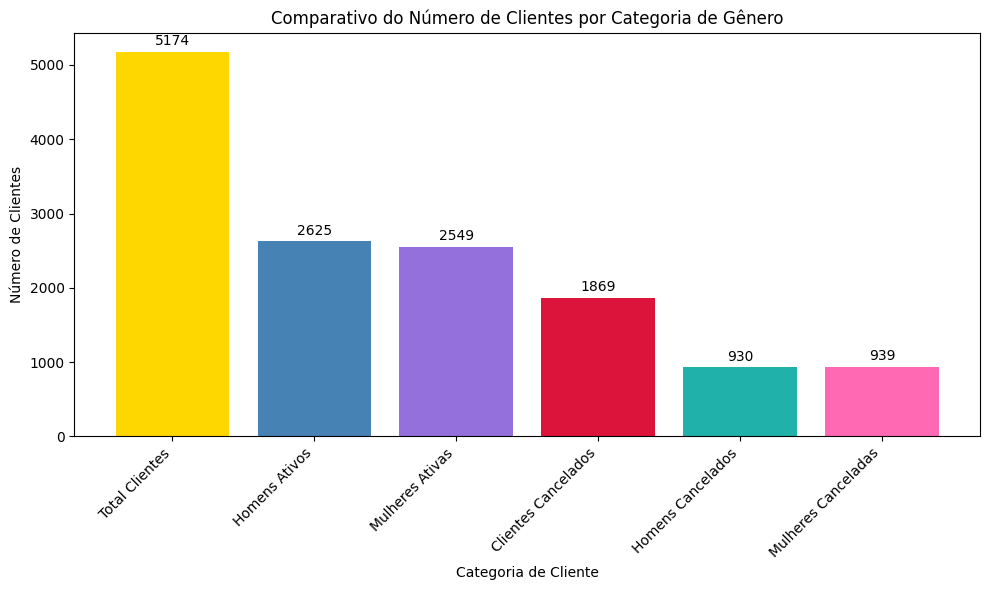

In [105]:
labels = ['Total Clientes', 'Homens Ativos', 'Mulheres Ativas', 'Clientes Cancelados', 'Homens Cancelados', "Mulheres Canceladas"  ]

# Define os valores para cada categoria com base nas variáveis previamente calculadas
# Certifique-se de que todas essas variáveis foram definidas anteriormente
values = [ Clientes_total, clientes_homens_ativos, clientes_mulheres_ativas, Clientes_Cancelados, clientes_homens_cancelados, clientes_mulheres_canceladas ]

# Inicializa o gráfico de barras e define o tamanho da figura
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['#FFD700', '#4682B4', '#9370DB', '#DC143C', '#20B2AA', '#FF69B4'])

# Define o título e os rótulos dos eixos
plt.title('Comparativo do Número de Clientes por Categoria de Gênero')
plt.xlabel('Categoria de Cliente')
plt.ylabel('Número de Clientes')

# Rotaciona os rótulos do eixo x para facilitar a leitura, se necessário
plt.xticks(rotation=45, ha='right')

# Exibe os valores numéricos acima de cada barra
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')

# Ajusta o layout para evitar sobreposição ou cortes nos elementos
plt.tight_layout()

# Renderiza o gráfico
plt.show()

In [106]:

dados_df['Servico_Telefone'] = dados_df['Servico_Telefone'].replace({True:'Yes', False: 'No'})
dados_df.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,2.97


In [107]:
Dados_clientes_Ativos = dados_df.query('Cancelou == "No"')
dados_clientes_não_ativos = dados_df.query('Cancelou == "Yes"')

In [108]:
Clientes_produtos_completos = Dados_clientes_Ativos.query('Servico_Telefone == "Yes" & Multiplas_Linhas == "Yes" & Suporte_Tecnico == "Yes" & Streaming_TV == "Yes" & Streaming_Filmes == "Yes"')
Clientes_nao_completos = Dados_clientes_Ativos.query('not (Servico_Telefone == "Yes" and Multiplas_Linhas == "Yes" and Suporte_Tecnico == "Yes" and Streaming_TV == "Yes" and Streaming_Filmes == "Yes")')


Clientes_produtos_completos_cancelado = dados_clientes_não_ativos.query('Servico_Telefone == "Yes" & Multiplas_Linhas == "Yes" & Suporte_Tecnico == "Yes" & Streaming_TV == "Yes" & Streaming_Filmes == "Yes"')
Clientes_nao_completos_cancelado = dados_clientes_não_ativos.query('not (Servico_Telefone == "Yes" and Multiplas_Linhas == "Yes" and Suporte_Tecnico == "Yes" and Streaming_TV == "Yes" and Streaming_Filmes == "Yes")')

print(f'O numero de clientes que tem todos os pacotes de serviço é de : {Clientes_produtos_completos.shape[0]} ou seja, {Clientes_produtos_completos.shape[0] / Dados_clientes_Ativos.shape[0]:.2%}. \n O numero de Clientes que nao possui o pacote completo: {Clientes_nao_completos.shape[0]}, ou seja, {Clientes_nao_completos.shape[0] / Dados_clientes_Ativos.shape[0]:.2%}')


print(f'O numero de clientes que tem todos os pacotes de serviço que cancelaram seu plano é de : {Clientes_produtos_completos_cancelado.shape[0]}, ou seja, {Clientes_produtos_completos_cancelado.shape[0] / dados_clientes_não_ativos.shape[0]:.2%} \n O numero de Clientes que nao possui o pacote completo e cancelaram: {Clientes_nao_completos_cancelado.shape[0]}, ou seja, {Clientes_nao_completos_cancelado.shape[0] / dados_clientes_não_ativos.shape[0]:.2%}')

O numero de clientes que tem todos os pacotes de serviço é de : 495 ou seja, 9.57%. 
 O numero de Clientes que nao possui o pacote completo: 4679, ou seja, 90.43%
O numero de clientes que tem todos os pacotes de serviço que cancelaram seu plano é de : 93, ou seja, 4.98% 
 O numero de Clientes que nao possui o pacote completo e cancelaram: 1776, ou seja, 95.02%


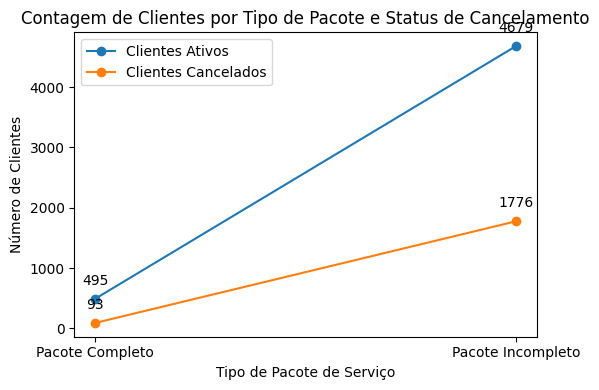

In [124]:
# Define os dados para o gráfico com base no tipo de pacote e status de cancelamento
categorias = ['Pacote Completo', 'Pacote Incompleto']
ativos_counts = [Clientes_produtos_completos.shape[0], Clientes_nao_completos.shape[0]]
cancelados_counts = [Clientes_produtos_completos_cancelado.shape[0], Clientes_nao_completos_cancelado.shape[0]]

# Inicializa o gráfico de linha
plt.figure(figsize=(6, 4))

# Plota a linha para clientes ativos
plt.plot(categorias, ativos_counts, marker='o', linestyle='-', label='Clientes Ativos')

# Plota a linha para clientes cancelados
plt.plot(categorias, cancelados_counts, marker='o', linestyle='-', label='Clientes Cancelados')

# Define título e rótulos dos eixos
plt.title('Contagem de Clientes por Tipo de Pacote e Status de Cancelamento')
plt.xlabel('Tipo de Pacote de Serviço')
plt.ylabel('Número de Clientes')
plt.legend()  # Exibe a legenda para identificar cada linha

# Adiciona os valores numéricos acima dos pontos da linha de clientes ativos
for i, txt in enumerate(ativos_counts):
    plt.annotate(txt, (categorias[i], ativos_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adiciona os valores numéricos acima dos pontos da linha de clientes cancelados
for i, txt in enumerate(cancelados_counts):
    plt.annotate(txt, (categorias[i], cancelados_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [110]:
# Calcula a taxa de cancelamento para clientes idosos com pacote completo
taxa_cancelamento_idosos = Clientes_produtos_completos_cancelado.shape[0] / dados_clientes_não_ativos.shape[0]

# Calcula a taxa de cancelamento para clientes não idosos com pacote incompleto
taxa_cancelamento_nao_idosos = Clientes_nao_completos_cancelado.shape[0] / dados_clientes_não_ativos.shape[0]

# Calcula a taxa de cancelamento por gênero
taxa_cancelamento_homens = clientes_homens_cancelados / Clientes_Homens_total
taxa_cancelamento_mulheres = clientes_mulheres_canceladas / Clientes_mulheres_total

# Calcula o total de clientes com pacote completo e incompleto (ativos + cancelados)
total_completo = Clientes_produtos_completos.shape[0] + Clientes_produtos_completos_cancelado.shape[0]
total_incompleto = Clientes_nao_completos.shape[0] + Clientes_nao_completos_cancelado.shape[0]

# Calcula a taxa de cancelamento para clientes com pacote completo e incompleto
taxa_cancelamento_pacote_completo = Clientes_produtos_completos_cancelado.shape[0] / total_completo if total_completo > 0 else 0
taxa_cancelamento_pacote_incompleto = Clientes_nao_completos_cancelado.shape[0] / total_incompleto if total_incompleto > 0 else 0

# Exibe as taxas de cancelamento por grupo
print(f"Taxa de Cancelamento - Idosos (Pacote Completo): {taxa_cancelamento_idosos:.2%}")
print(f"Taxa de Cancelamento - Não Idosos (Pacote Incompleto): {taxa_cancelamento_nao_idosos:.2%}")
print(f"Taxa de Cancelamento - Homens: {taxa_cancelamento_homens:.2%}")
print(f"Taxa de Cancelamento - Mulheres: {taxa_cancelamento_mulheres:.2%}")
print(f"Taxa de Cancelamento - Pacote Completo: {taxa_cancelamento_pacote_completo:.2%}")
print(f"Taxa de Cancelamento - Pacote Incompleto: {taxa_cancelamento_pacote_incompleto:.2%}")

# Identifica o grupo com a maior taxa de cancelamento (vazão)
taxas = {
    'Idosos (Pacote Completo)': taxa_cancelamento_idosos,
    'Não Idosos (Pacote Incompleto)': taxa_cancelamento_nao_idosos,
    'Homens': taxa_cancelamento_homens,
    'Mulheres': taxa_cancelamento_mulheres,
    'Pacote Completo': taxa_cancelamento_pacote_completo,
    'Pacote Incompleto': taxa_cancelamento_pacote_incompleto
}

grupo_maior_vazao = max(taxas, key=taxas.get)
maior_taxa = taxas[grupo_maior_vazao]

# Exibe o grupo com maior taxa de cancelamento
print(f"\nO grupo com a maior taxa de cancelamento ('Vazão') é: {grupo_maior_vazao} com {maior_taxa:.2%}")

Taxa de Cancelamento - Idosos (Pacote Completo): 4.98%
Taxa de Cancelamento - Não Idosos (Pacote Incompleto): 95.02%
Taxa de Cancelamento - Homens: 25.31%
Taxa de Cancelamento - Mulheres: 26.14%
Taxa de Cancelamento - Pacote Completo: 15.82%
Taxa de Cancelamento - Pacote Incompleto: 27.51%

O grupo com a maior taxa de cancelamento ('Vazão') é: Não Idosos (Pacote Incompleto) com 95.02%


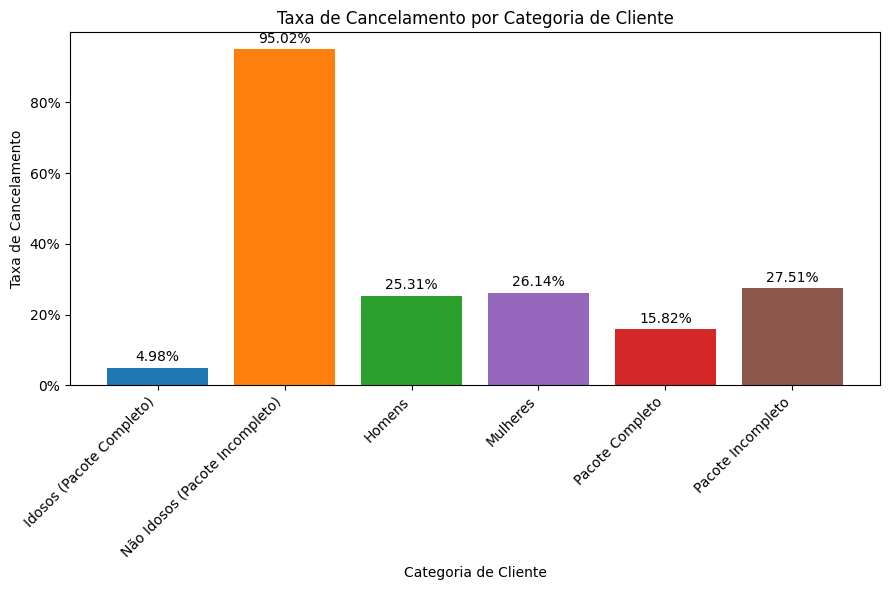

In [119]:
# Prepara os dados para o gráfico de barras a partir do dicionário 'taxas'
labels = list(taxas.keys())
values = list(taxas.values())

# Configura e desenha o gráfico de barras com cores personalizadas
plt.figure(figsize=(9, 6))
plt.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b'])

# Define título e rótulos dos eixos
plt.title('Taxa de Cancelamento por Categoria de Cliente')
plt.xlabel('Categoria de Cliente')
plt.ylabel('Taxa de Cancelamento')

# Formata os valores do eixo y como porcentagens
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Rotaciona os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Exibe os valores percentuais acima de cada barra
for i, value in enumerate(values):
    plt.text(i, value + 0.01, '{:.2%}'.format(value), ha='center', va='bottom')

# Ajusta o layout para evitar sobreposição ou cortes nos elementos
plt.tight_layout()

# Renderiza o gráfico
plt.show()

In [112]:

dados_clientes_não_ativos.Tipo_Contrato.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [113]:
dados_clientes_não_ativos.Metodo_Pagamento.unique()

array(['Electronic check', 'Mailed check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [114]:
# Seleciona apenas os clientes que cancelaram o serviço
clientes_cancelaram = dados_df.query('Cancelou == "Yes"')

# Calcula a porcentagem de cada método de pagamento entre os clientes que cancelaram
metodos_pagamento_cancelados = round(clientes_cancelaram['Metodo_Pagamento'].value_counts(normalize=True)*100, 2)

# Calcula a porcentagem de cada tipo de contrato entre os clientes que cancelaram
tipos_de_contratos_cancelados = round(clientes_cancelaram['Tipo_Contrato'].value_counts(normalize=True)*100, 2)

# Exibe os resultados da análise de métodos de pagamento
print("Frequência dos Métodos de Pagamento entre Clientes que Cancelaram:")
display(metodos_pagamento_cancelados)

# Exibe os resultados da análise de tipos de contrato
print("Frequência dos tipos de contratos entre Clientes que Cancelaram:")
display(tipos_de_contratos_cancelados)

Frequência dos Métodos de Pagamento entre Clientes que Cancelaram:


,proportion
Metodo_Pagamento,
Electronic check,57.30
Mailed check,16.48
Bank transfer (automatic),13.80
Credit card (automatic),12.41


Frequência dos tipos de contratos entre Clientes que Cancelaram:


,proportion
Tipo_Contrato,
Month-to-month,88.55
One year,8.88
Two year,2.57


In [115]:
dados_numericos = dados_clientes_não_ativos[['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total', 'Cobranca_diaria_(valorMensal)', 'Cobranca_diaria_(valorTotal)']]

dados_numericos.head()



,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
2,4,73.9,280.85,2.46,2.34
3,13,98.0,1237.85,3.27,3.17
4,3,83.9,267.40,2.80,2.97
18,45,62.7,2791.50,2.09,2.07
19,1,25.1,25.10,0.84,0.84


In [116]:
print(f"O minimo que o cliente permaneceu e cancelou foi de: {dados_numericos['Meses_Permanencia'].min()} mes")
print(f"O maximo que o Cliente permeneceu e cancelou foi de : {dados_numericos['Meses_Permanencia'].max()} meses")
print(f"tendo a média de permanencia de : {dados_numericos['Meses_Permanencia'].mean():.2f} meses")

O minimo que o cliente permaneceu e cancelou foi de: 1 mes
O maximo que o Cliente permeneceu e cancelou foi de : 72 meses
tendo a média de permanencia de : 17.98 meses


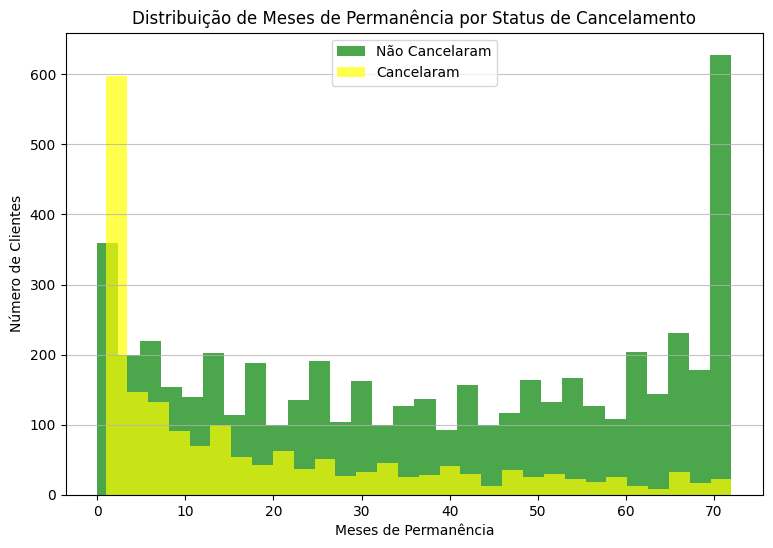

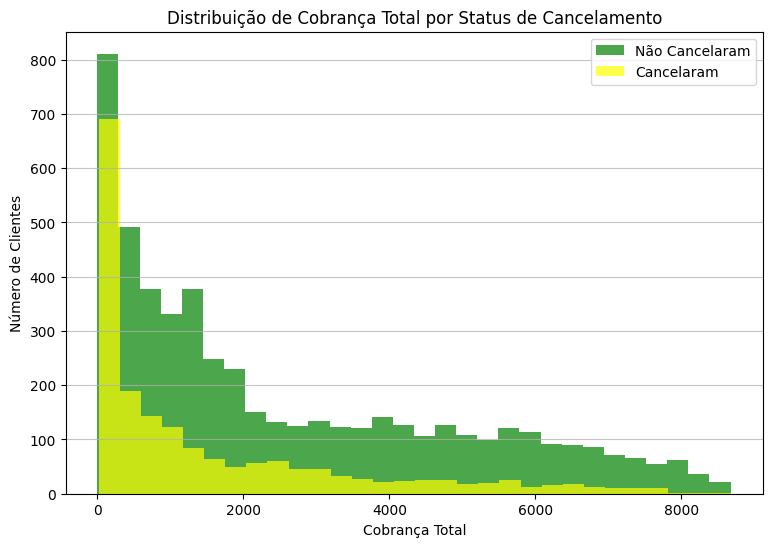

In [121]:
# Filtra os clientes com base no status de cancelamento
clientes_cancelaram = dados_df.query('Cancelou == "Yes"')
clientes_nao_cancelaram = dados_df.query('Cancelou == "No"')

# Gera histograma para visualizar a distribuição dos meses de permanência por grupo
plt.figure(figsize=(9, 6))
plt.hist(clientes_nao_cancelaram['Meses_Permanencia'], bins=30, alpha=0.7, label='Não Cancelaram', color='green')
plt.hist(clientes_cancelaram['Meses_Permanencia'], bins=30, alpha=0.7, label='Cancelaram', color='yellow')
plt.title('Distribuição de Meses de Permanência por Status de Cancelamento')
plt.xlabel('Meses de Permanência')
plt.ylabel('Número de Clientes')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Gera histograma para visualizar a distribuição da cobrança total por grupo
plt.figure(figsize=(9, 6))
plt.hist(clientes_nao_cancelaram['Cobranca_Total'], bins=30, alpha=0.7, label='Não Cancelaram', color='green')
plt.hist(clientes_cancelaram['Cobranca_Total'], bins=30, alpha=0.7, label='Cancelaram', color='yellow')
plt.title('Distribuição de Cobrança Total por Status de Cancelamento')
plt.xlabel('Cobrança Total')
plt.ylabel('Número de Clientes')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# 📄 Relatório Final

## Introdução
Explique o objetivo da análise e a importância de entender o problema de evasão de clientes (Churn) para a TelecomX.

## Limpeza e Tratamento de Dados
Descreva brevemente os passos principais que você realizou para importar, limpar e preparar os dados para análise. Mencione a combinação dos DataFrames, a renomeação de colunas, a conversão de tipos de dados, o tratamento de valores nulos e a verificação de "falso nulos".

## Análise Exploratória de Dados
Apresente as análises que você realizou para entender os padrões de cancelamento. Inclua as suas principais descobertas e os gráficos que as ilustram. Você pode falar sobre:
*   Análise de Idosos vs Não Idosos e a taxa de cancelamento entre eles.
*   Análise por Gênero e a taxa de cancelamento.
*   Análise de Clientes com Pacote Completo vs Incompleto e suas taxas de cancelamento.
*   Análise dos Métodos de Pagamento mais comuns entre clientes que cancelaram.
*   Análise da distribuição de variáveis numéricas (`Meses_Permanencia`, `Cobranca_Total`) entre clientes que cancelaram e não cancelaram.
*   Qual grupo apresentou a maior taxa de cancelamento ("vazão").

Certifique-se de adicionar os gráficos relevantes (copiando e colando as imagens ou gerando-os novamente se necessário) nas seções apropriadas para dar suporte às suas conclusões.

## Conclusões e Insights
Resuma os principais aprendizados da sua análise exploratória. O que os dados mostram sobre os clientes que tendem a cancelar? Quais fatores parecem ter mais impacto na evasão?

## Recomendações
Com base nos seus insights, quais ações a TelecomX poderia considerar para tentar reduzir a evasão de clientes? Pense em sugestões práticas relacionadas aos padrões que você identificou.

# 🧭 Introdução
O objetivo desta análise foi examinar os dados de clientes da TelecomX para identificar os principais fatores que contribuem para a evasão (churn). Reduzir o churn é essencial para garantir a sustentabilidade e o crescimento da empresa. Ao reconhecer padrões associados ao cancelamento, é possível desenvolver estratégias de retenção mais eficazes e direcionadas.

🧼 Limpeza e Tratamento de Dados
Os dados foram carregados a partir de um arquivo JSON, reunindo informações de diferentes seções — customer, phone, internet e account — em um único DataFrame.
As etapas de preparação incluíram:
- 🔤 Renomeação de colunas para maior clareza (ex.: customerID → ID_Cliente, Churn → Cancelou)
- 🔢 Conversão de variáveis como Meses_Permanencia, Cobranca_Mensal e Cobranca_Total para tipos numéricos
- 🧮 Preenchimento de valores nulos na coluna Cobranca_Total com zero
- 🕵️ Verificação de "falsos nulos" em colunas do tipo object, identificando 224 linhas com espaços em branco na coluna Cancelou, que foram removidas do DataFrame
- 📆 Criação de novas colunas para análise de cobranças diárias
Essa etapa foi fundamental para garantir a integridade dos dados e a confiabilidade dos resultados obtidos nas análises subsequentes.

## 📉 Análise de Evasão de Clientes (Churn)

Reduzir a evasão de clientes é essencial para garantir a sustentabilidade e o crescimento da empresa. Este estudo examina os dados disponíveis para identificar padrões e propor estratégias eficazes de retenção.

---

### 👥 Perfil Demográfico

- **Idade**: A maioria dos clientes está entre 30 e 55 anos. Idosos representam 16,27% da base total.
- **Gênero**: A taxa de cancelamento é ligeiramente maior entre mulheres (26,14%) do que entre homens (25,31%).

🔍 *Insight*: Embora a diferença entre gêneros seja pequena, vale investigar se há fatores específicos que influenciam essa variação.

---

### 💼 Tipo de Pacote Contratado

- Clientes com **pacote completo** têm uma taxa de cancelamento de **15,82%**.
- Já os que possuem **pacote incompleto** apresentam uma taxa significativamente maior: **27,51%**.

📌 *Conclusão*: Oferecer pacotes mais completos pode aumentar a retenção. Estratégias como upgrades personalizados ou benefícios adicionais podem ser eficazes.

---

### 💳 Método de Pagamento

- O método **Electronic Check** está fortemente associado ao cancelamento, com uma taxa de **57,30%**.
- Outros métodos, como cartão de crédito ou débito automático, apresentam taxas bem menores.

💡 *Sugestão*: Incentivar métodos de pagamento mais estáveis pode reduzir o churn. Oferecer descontos ou benefícios para quem migra de Electronic Check pode ser uma boa estratégia.

---

### 📊 Análise Financeira

- Clientes que cancelam tendem a acumular **valores totais mais baixos**, o que indica menor tempo de permanência.
- Já os clientes fiéis apresentam uma **variação maior nos valores pagos**, refletindo diferentes níveis de engajamento.

🔍 *Interpretação*: O valor total pago pode ser um bom indicador de fidelidade. Monitorar esse dado ajuda a prever possíveis cancelamentos.

---

### 📅 Padrões Temporais

- A evasão ocorre de forma relativamente uniforme ao longo do tempo, sem picos sazonais evidentes.

📌 *Conclusão*: Estratégias de retenção devem ser contínuas, não apenas concentradas em períodos específicos.

---

### 🧼 Qualidade dos Dados

- Foram identificados **valores nulos e espaços em branco** em algumas colunas, o que pode comprometer a análise.
- A limpeza e padronização dos dados é essencial para garantir resultados confiáveis.

---

## ✅ Recomendações Finais

1. **Oferecer pacotes mais completos** com benefícios personalizados.
2. **Incentivar métodos de pagamento mais seguros**, como cartão de crédito.
3. **Monitorar o valor total pago** como indicador de risco de cancelamento.
4. **Investir em ações de retenção contínuas**, sem depender de sazonalidade.
5. **Melhorar a qualidade dos dados** para análises mais precisas.

---